# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# load pep8
# %load_ext pep8magic

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
#%%pep8
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [data['Milk'].argmax(), 30, 13]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns=data.keys()).reset_index(drop=True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  22925  73498    32114     987             20070           903
1  18815   3610    11107    1148              2134          2963
2  21217   6208    14982    3095              6707           602

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

* No.0
  *  This establishment buys milk the most. I think they serve foods which are made of milk for end-consumers. Another feature is that both detergent paper and grocery exceed average. I think this establishment has their own shops where consumer can eat thier foods. This is because such shop needs to wash dishes and provide expendable supplies (something like napkins) for each consumer. Therefore I think standard bakery can be excluded. My image is coffee stores or sweets (something like cake) stores. Moreover, this establishment buy a lot of fresh (maybe fruit), so sweets chain stores seems to be more possible.
* No.1
  * Detergent paper is under the average, and fresh and grocery high (exceed 75%). I think these designate that they provide foods for end-consumers. They might have their own shop where consumers can not eat. This is beause they do not need wash someshing for each customer. I think they provide takeout or delivery foods (something like pizza).
  
* No.2
  * This establishment feature is that fresh, grocery and detergents paper are relatively high. I think this customer is a restaurant which uses much fresh foods and needs to wash something frequently and carefully. For example, a steakhouse or a chinease reastaurant. I think this is because both restaurants often serve greasy dishes.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
#%%pep8
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
target_feature = 'Frozen'
removed_feature = data[target_feature]
new_data = data.drop(target_feature, axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
from sklearn.cross_validation import train_test_split
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, removed_feature,
                                                    test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
scoring = make_scorer(r2_score)
grid_obj = GridSearchCV(DecisionTreeRegressor(random_state=42),
                        param_grid={
                            'presort': [True],
                            'splitter': ['best', 'random'],
                            'min_samples_split': range(2, 8, 2),
                            'max_depth': range(2, 8, 2),
                            'min_samples_leaf': range(1, 6, 2),
                        },
                        scoring=scoring, cv=5, refit=True)
grid_fit = grid_obj.fit(X_train, y_train)
regressor = grid_fit.best_estimator_

# TODO: Report the score of the prediction using the testing set
score = r2_score(y_test, regressor.predict(X_test))
print("r2 prediction score={score}".format(score=score))


# references
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py
# https://stackoverflow.com/questions/44682307/using-decision-tree-regression-and-cross-validation-in-sklearn


/home/sthin/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


r2 prediction score=0.095930421402


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

Q. Which feature did you attempt to predict?<br>
A. Frozen
 
Q. What was the reported prediction score?<br>
A. Frozen's R^2 score is 0.0959

Q. Is this feature necessary for identifying customers' spending habits?<br>
A. Frozen's R^2 score is very low and this shows Frozen can not be explained by other features. Therefore, I think Frozen is necessary.

In [25]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

def r_2_mean(data,feature,runs=200):
    return np.array([calculate_r_2_for_feature(data,feature)
                     for _ in range(200) ]).mean().round(4)

print "{0:17} {1}".format("Fresh: ", r_2_mean(data,'Fresh'))
print "{0:17} {1}".format("Milk: ", r_2_mean(data,'Milk'))
print "{0:17} {1}".format("Grocery: ", r_2_mean(data,'Grocery'))
print "{0:17} {1}".format("Frozen: ", r_2_mean(data,'Frozen'))
print "{0:17} {1}".format("Detergents_Paper: ", r_2_mean(data,'Detergents_Paper'))
print "{0:17} {1}".format("Delicatessen: ", r_2_mean(data,'Delicatessen'))

Fresh:            -0.7071
Milk:             0.0573
Grocery:          0.6717
Frozen:           -1.1141
Detergents_Paper:  0.6794
Delicatessen:     -2.8856


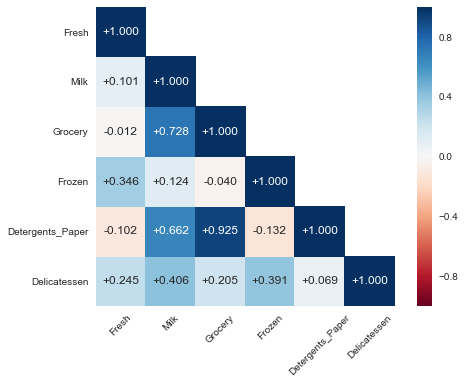

In [26]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8faa108990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8f9d4dd050>]], dtype=object)

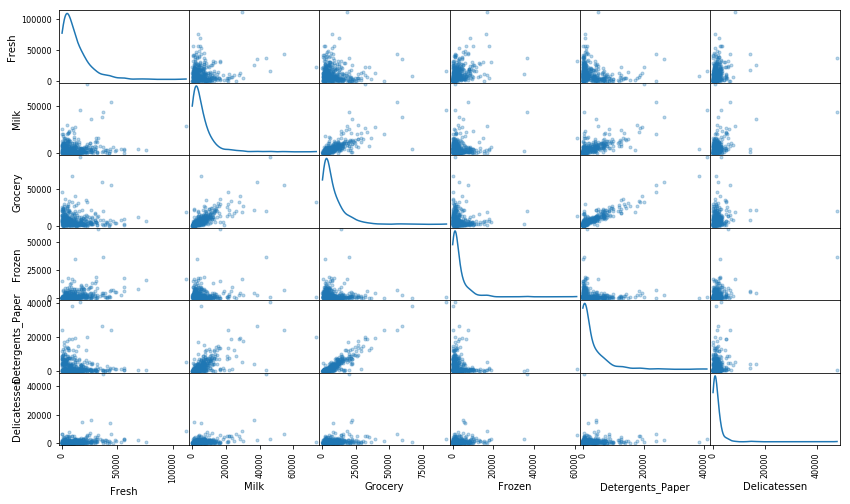

In [6]:
#%%pep8
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha=0.3, figsize=(14, 8), diagonal='kde')

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

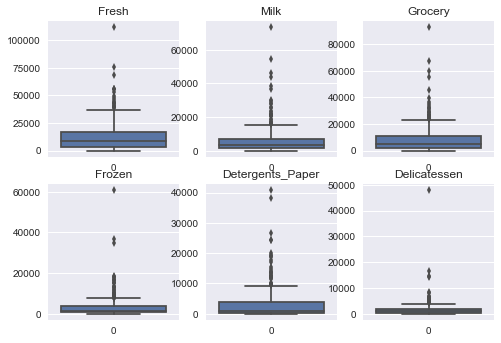

In [7]:
#%%pep8
import seaborn as sns
import matplotlib.pyplot as plt

# boxplot each feature for checking outliers
f, axes = plt.subplots(2, 3)
for i, col in enumerate(data.columns):
    sns.boxplot(data=data[col], ax=axes[i / 3, i % 3]).set_title(col)

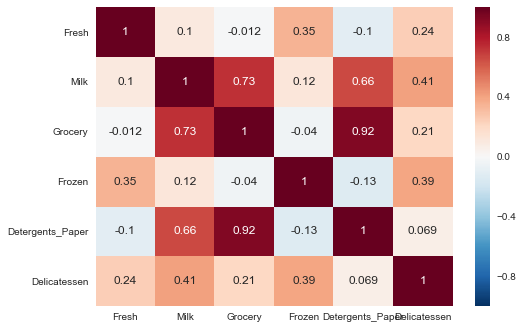

In [8]:
# show heatmap for checking correleation
sns.heatmap(data.corr(), annot=True)

**Answer:**

Q. Discuss the distribution of the dataset  
A.  

* We can confirm each feature's histogram by checking scatter matrix's diagonal.
  * For every feature, almost data concentrate on near 0 in the graphs. And outliers exist on the one side, which have large value. Therefore, I think the distributions are not normal distribution.
* We can also confirm outlier distributions in the boxplots above more clearly.
  * I think the boxplots show that Frozen and Delicatessen have more outstanding outliers than the other features. This is because Frozen and Delicatessen's ratio, IRQ over min-max range, seems to be smaller than others.


Q. Are there any pairs of features which exhibit some degree of correlation?  
A.
* We can confirm correlation from each distribution's shapes in the scatter matrix.
  * "Detergents_paper and Grocery" distribution has linear-like shape and this shows strong correlation. I think "Detergents_paper and Milk" and "Grocery and Milk" have also linear-like shape and have correlation.
* We can confirm correlation from the heatmap above more clearly.
  * The heatmap show "Detergents_paper and Grocery" has strong correlation and "Detergents_paper and Milk" and "Grocery and Milk" have correlation.

Q. Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?  
A. The heatmap shows my selected feature(Frozen) has no correlation with the other features. Therefore, I think my suspictions could confirm.
  
Q. How is the data for those features distributed?  
A. From the scatter matrix above ...
* Fresh has no correleation with the other features.
* Milk has correllation with Grocery and Ditergents_paper.
* Grocery has strong correlation with Ditergents_paper and correlation with Milk.
* Frozen has no correllation with the other features.
* Ditergents_paper has strong correlation with Grocery and correllation with Milk.
* Delicatessen has no correlaltion with the other features.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f95f51e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8f94e214d0>]], dtype=object)

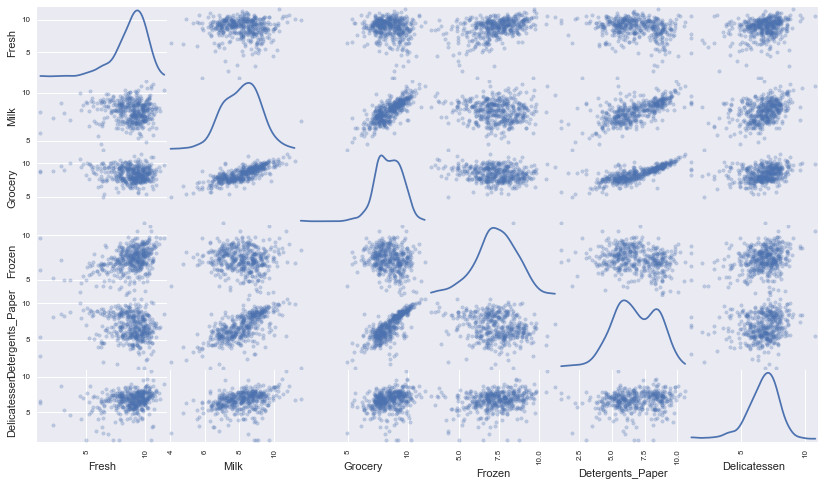

In [9]:
#%%pep8
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha=0.3, figsize=(14, 8), diagonal='kde')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
1   9.842410   8.191463   9.315331  7.045777          7.665753      7.993958
2   9.962558   8.733594   9.614605  8.037543          8.810907      6.400257

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
#%%pep8
outliers_id_sets = []
outlier_set = set()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)

    # extract outliers
    outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    # extract outliers row ids
    outliers_id_sets.append(set(outliers.index.values))
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(outliers)
    outlier_set |= set(outliers.index.values)

print("number of all outliers = {}".format(len(outlier_set)))

# collect duplicated outlier ids
duplicated_outlier_id_set = set()
for i in range(len(outliers_id_sets) - 1):
    for j in range(i+1, len(outliers_id_sets)):
        # join outlier id which appears in mulitiple features
        duplicated_outlier_id_set |= outliers_id_sets[i] & outliers_id_sets[j]
duplicated_outlier_ids = sorted(list(duplicated_outlier_id_set))
print("outlier ids which appear in multiple features: " +
      str(duplicated_outlier_ids))

# OPTIONAL: Select the indices for data points you wish to remove
outliers = duplicated_outlier_ids

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop=True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

number of all outliers = 42
outlier ids which appear in multiple features: [65, 66, 75, 128, 154]


In [12]:
#%%pep8
print("Outlier indexes:" + str(duplicated_outlier_ids))
print("Log data's statistical information.")
display(log_data.describe())

print("Outliers log data.")
outliers_log_data = pd.DataFrame(log_data.loc[duplicated_outlier_ids], columns=log_data.keys()).reset_index(drop=True)
display(outliers_log_data)

Outlier indexes:[65, 66, 75, 128, 154]
Log data's statistical information.


Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  440.000000  440.000000  440.000000  440.000000        440.000000   
mean     8.730544    8.121047    8.441169    7.301396          6.785972   
std      1.480071    1.081365    1.116172    1.284540          1.721020   
min      1.098612    4.007333    1.098612    3.218876          1.098612   
25%      8.048059    7.334981    7.674616    6.609678          5.548101   
50%      9.048286    8.196159    8.467057    7.330388          6.705018   
75%      9.737064    8.880480    9.273854    8.175896          8.274341   
max     11.627601   11.205013   11.437986   11.016479         10.617099   

       Delicatessen  
count    440.000000  
mean       6.665133  
std        1.310832  
min        1.098612  
25%        6.011875  
50%        6.872645  
75%        7.506728  
max       10.777768

Outliers log data.


Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  4.442651  9.950323  10.732651  3.583519         10.095388      7.260523
1  2.197225  7.335634   8.911530  5.164786          8.151333      3.295837
2  9.923192  7.036148   1.098612  8.390949          1.098612      6.882437
3  4.941642  9.087834   8.248791  4.955827          6.967909      1.098612
4  6.432940  4.007333   4.919981  4.317488          1.945910      2.079442

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

Q. Are there any data points considered outliers for more than one feature based on the definition above? 

A.  
Accoding to the duplicated_outlier_id_set above, No. 65, 66, 75, 128, 154 appear in multiple features.
 * No.65 is outlier in Fresh and Frozen because of low values both.
 * No.66 is outlier in Fresh and Delicatessen because of low values both.
 * No.75 is outlier in Grocery and Delicatessen because of low values both.
 * No.128 is outlier in Fresh and Delicatessen because of low values both.
 * No.154 is outlier in Detergents_Paper, Grocery and Delicatessen because of low values each.
 * Especially, every No.154's feature is out of IRQ.


  
Q. Should these data points be removed from the dataset?  
Q. If any data points were added to the outliers list to be removed, explain why. 

A.  
According to the reference2(outliers.pdf) below, as in the case of k-means it is well known that both the mean and standard deviation are extremely sensitive to outliers, and one “bad point” can skew the mean and the variance. According to the reference3 below, k-Means is one of the most well
known clustering algorithms yet it suffers major shortcomings
like initialize number of clusters and seed values preliminary and
converges to local minima. Especially, I think that if one of the random choice of initial centroids is near a outlier, result is skewed. Therefore, removing outliers suppress skewing a result of clustering in general.

I think we can take 3 levels to suppress outlier's affect in this project. 
* Level1: not to remove any outliers. 
* Level2: removing outliers which appear in multiple features(No.65, 66, 75, 128, 154).
* Level3: removing all outliers.

The bigger the level become, the more dataset suppress outlier's affect. However, the number of all outliers are 42 and I think it is too learge for the total dataset size(440), about 10%. Therefore, I think level2(removing outliers which appear in multiple features) is moderate.

* references
  1. Algorithms for Mining Distance-Based Outliers in Large Datasets 
    * http://www.vldb.org/conf/1998/p392.pdf
  2. k-means--: A unified approach to clustering and outlier detection
    * http://www.pmg.it.usyd.edu.au/outliers.pdf
  3. Impact of Outlier Removal and Normalization Approach in Modified k-Means Clustering Algorithm
    * http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.403.675&rep=rep1&type=pdf

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

total of first two principal components variance = 0.706817230807
total of first four principal components variance = 0.931090109951


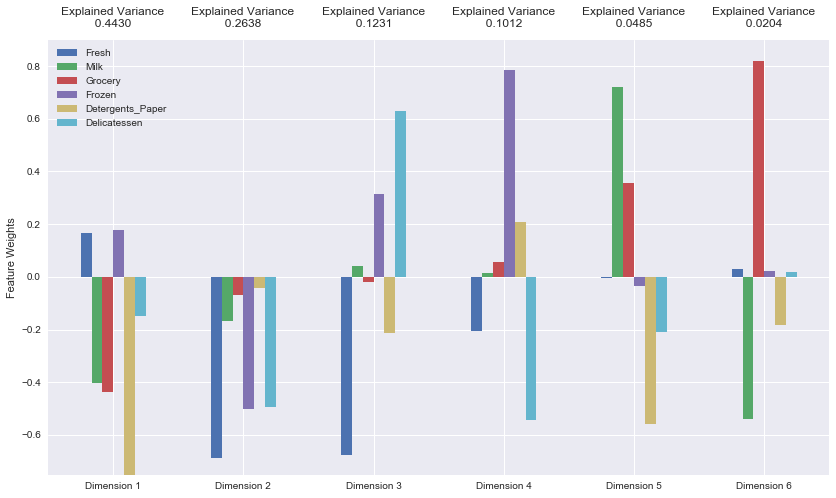

In [13]:
#%%pep8
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(random_state=42).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

# principal components variance ratios
pc_ratios = pca.explained_variance_ratio_
print("total of first two principal components variance = {}".format(sum(pc_ratios[:2])))
print("total of first four principal components variance = {}".format(sum(pc_ratios[:4])))

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

Q. How much variance in the data is explained in total by the first and second principal component?  
A. 0.7068(= 0.4430 + 0.2638)

Q. How much variance in the data is explained by the first four principal components?  
A. 0.9310(= 0.4430 + 0.2638 + 0.1231 + 0.1012)  
I think the more than 0.9 score shows that these four dimensions can describe the customer spending enough.


Q. Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.  
A.  
1. In the first dimension, the most occupied weights are Milk, Grocery, and Detergents_Paper. These weights are negative. The second most occupied features in the first dimension are Fresh and Frozen. These weights are positive. The Fresh and Frozen have role as counterpart of the first three features(Milk, Grocery, and Detergents_paper). This is because the mean should be near 0. 
2. In the second dimension, the mainly occupied weights are the other features(Fresh, Frozen, and Delicatessen). These three weights are negative. In other words, the Fresh and Frozen weigths have opposite direction to the first dimension's Fresh and Frozen weights.
3. In the third dimension, the mainly occupied weights are Fresh and Delicatessen. The Fresh weight is negative and the Frozen weight is positive.
4. In the fourth dimension, the mainly occupied weights are Frozen and Delicatessen. The Frozen weight is positive and the Delicatessen weight is negative. The Delicatessen weight direction is opposite to the third dimension Delicatessen weight.

I think the item1 shows that Milk, Grocery, and Detergents_paper have correlation to each others. And, it also show that **these three features (Milk, Grocery, and Detergents_paper) were aggregated into dimension1**. Item2. 3. and 4. show that the other features(Fresh, Frozen, and Delicatessen) have opposite directions to each other feature in the same dimension. I think this is becase that each feature and dimenstion has to complement with each other feature and dimention by weighting opposite direction. Therefore, I think **the three features have no correlation to another feature**. Moreover, **the number of dimension(2,3,4) is corresponding to the number of features, Fresh, Frozen, Delicatessen**. These are corresponded with the scatter matrix above.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [14]:
#%%pep8
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns=pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -4.2903      -1.4952      -1.4997       0.1394       1.1469   
1      -1.1156      -1.3483      -0.1973      -0.9135      -0.4000   
2      -1.8891      -1.3001      -1.1945       0.9689      -0.2426   

   Dimension 6  
0      -0.6255  
1       0.5608  
2       0.2970

* At No.0, dimension1 has larger weight than the other dimensions. This seems to be because No.0 has high Milk cost.
* At No.1, dimension1 and dimension2 have a relatively higher weight. This seems to be because No.1 has both high Fresh and Grocery values.
* At No.2, dimsnsion1 and dimansion2 have a relatively high weight. I think this seems to be becase Fresh and Detergents_paper's costs exceed 75%.

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [15]:
#%%pep8
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, random_state=42).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [16]:
#%%pep8
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns=['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -4.2903      -1.4952
1      -1.1156      -1.3483
2      -1.8891      -1.3001

I think the characteristic which can be seen at six dimensions observation remains at two dimension observation.

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

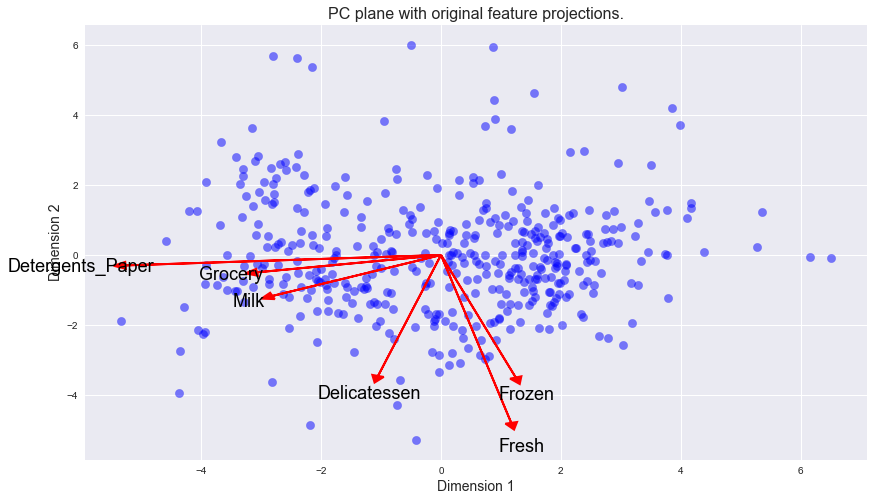

In [17]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

A.  
Considering the weights are negative, the drections seem to be opposite. Most strongly correlated features with the first component seem to be 'Milk', 'Grocery' and 'Detergents_Paper'. And the second seems to be Frozen or Fresh. I think these are roughly corresponding with the pca_results.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

Q. What are the advantages to using a K-Means clustering algorithm?  
A. K-Means clustering is hard clustering in which one data must belong to one class. This clustering has advantage in case that the number of class is clearly determined.

Q. What are the advantages to using a Gaussian Mixture Model clustering algorithm?  
A. Gaussian Mixture Model clustering is soft clustering in which one data probabilistically belongs to some classes. This clustering has advantage in case that the number of class is ambiguous.

Q. Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?  
A. I think Gaussian Mixture Model clustering is sutable because the wholesale customer data has no clear structure, and some data might belong to several clusters.

* reference
  * Lesson 3: More Clustering. 5. Quize: Soft Clustering Quiz, 6. Soft Clustering.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [18]:
#%%pep8
from sklearn import mixture

# TODO: Apply your clustering algorithm of choice to the reduced data
n_components = 2
clusterer = mixture.GaussianMixture(n_components=n_components, random_state=42).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
print("sample data cluster = {}".format(sample_preds))

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data, preds)

print("the mean silhouette coefficient = {0:.4f}".format(score))

sample data cluster = [1 0 1]
the mean silhouette coefficient = 0.4219


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

| number of cluster      | 2      | 3      | 4      | 5      | 6      | 7      |
|--------|--------|--------|--------|--------|--------|--------|
| silhouette score | 0.4219 | 0.4042 | 0.2933 | 0.3005 | 0.3261 | 0.3242 |

Two cluster had the best silhouette score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

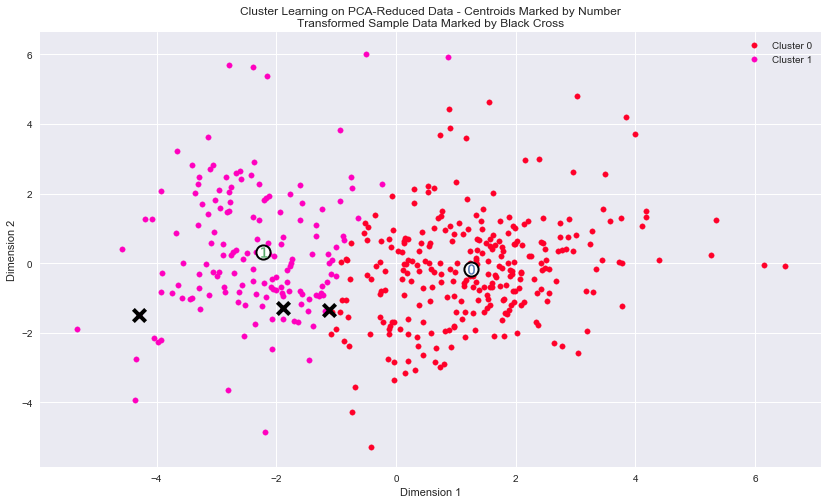

In [19]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [20]:
#%%pep8
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0, len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns=data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8953.0  2114.0   2765.0  2075.0             353.0         732.0
Segment 1  3552.0  7837.0  12219.0   870.0            4696.0         962.0

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

In [21]:
# Display the mean of the dataset again
print("Each feature mean")
display(data.mean())

Each feature mean


Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

Compared with mean values of the dataset at the beginng of this project, each segment's centor Milk, Grocery, and Detergents_paper values's mean is close to the total dataset's mean. I think that the segment0 can represent that Milk, Grocery, and Detergents_paper value are relatively low, and the segments1 can represent that these values are relatively high.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [22]:
#%%pep8
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

print("Display samples of wholesale customers dataset again:")
display(samples)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1
Display samples of wholesale customers dataset again:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  22925  73498    32114     987             20070           903
1  18815   3610    11107    1148              2134          2963
2  21217   6208    14982    3095              6707           602

**Answer:**

* Sample point 0
  * All Milk, Grocery, and Detergents_paper's values are higher than the mean of total datasets. Therefore, I think this point is in cluster 1 and this prediction is correct.
* Sample point 1
  * Milk and Detergents_paper's values are lower than the mean of total datasets. And Grocery's value is higher than the mean of total datasets. It seems to be difficult to determine. However, I think this point is in Segment0 because two of these key features are higher than the mean of total datasets and Grocery value is lower than center of Segment1. Therefore, I think this prediction is correct.
* Sample point 2
  * All Milk, Grocery, and Detergents_paper's values are higher than the mean of total datasets. Therefore, I think this point is in cluster 1 and this prediction is correct.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Customers in Segment0 deal with smaller amount of products than Segment1. Customers who needs small amount products do not need frequent delivery. Conversely, customers who deal large amount products need frequent delivery and might be seriously affected by this change. Therefore, to avoid negative affect, we have to test for customers in Segment0.

In reality, I think we need to consider not only these segments(deal amount of Milk, Grocery, and Detergents_Paper) but also quality deterioration of Fresh. Compared with other features, Fresh needs to be delivered as soon as possible. Therefore, I think, to avoid negative impact more carefully, we have to test for customers who belong to Segment0 and deal with small amount of Fresh.

* references
  * https://www.quora.com/When-should-A-B-testing-not-be-trusted-to-make-decisions/answer/Edwin-Chen-1
  * from Slack MLND #ml-unsuperviesed
    * https://mlnd.slack.com/archives/C0EQKMUQN/p1474214981000107

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We can use the procedure that predicts sample data segments above.

1. Scale the estimated data using the natural logarithm.
2. Transform the scaled estimated data by using the trained PCA above.
3. Predict the cluster for each transformed estimated data by using the trained clusterer above.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

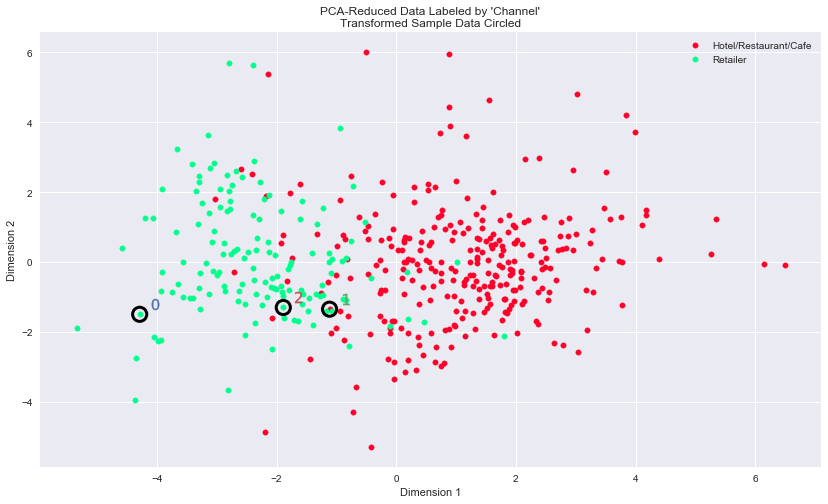

In [23]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

At first, I'm going to calculate similality of Channel classification and customer segment clustering.

The similality metrics are below.
* A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
* A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
* v_measure is harmonic mean of the first two
* references
  * http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html
  * http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness
  * http://www.learnbymarketing.com/methods/k-means-clustering/

In [24]:
#%%pep8
from sklearn.metrics import homogeneity_completeness_v_measure

# load original data for Channel
org_data = pd.read_csv("customers.csv")
# drop outliers
droped_org_data = org_data.drop(org_data.index[outliers]).reset_index(drop=True)
# compare Channel classification with customer segments.
homogeneity_completeness_v_measure(droped_org_data['Channel'].values, preds)

(0.5198870918091022, 0.5039263310638612, 0.51178230112993783)

Q. How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?  
A. The number of clusters is same as the number of Channel's labels. I think the Hotel/Restaurant/Cafe and Retailer customer distributions is roughly matched to segment2 and segment1 respectively. Therefore, I think the algorithm is suitable enough. 

Q. Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?  
A. As discription above, each segment1 and segment2 seems to be classified Retailers and Hotels/Restaurants/Cafes respectively. However, the boader between 'Retailers' and Hotels/Restaurants/Cafes are more unclearer than the segment's boarder in dimenstion1/2 coordination. Therefore, I think customer segment's ditribution can not be purely classified as the Cannel's labels. 

Q. Would you consider these classifications as consistent with your previous definition of the customer segments?  
A. Accoding the result of clustering similality score(about 0.5), I think we can say there are similality between these classifications and the customer segments. However, I do not consider these classifications as strongly consistent with the customer segments.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.